In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


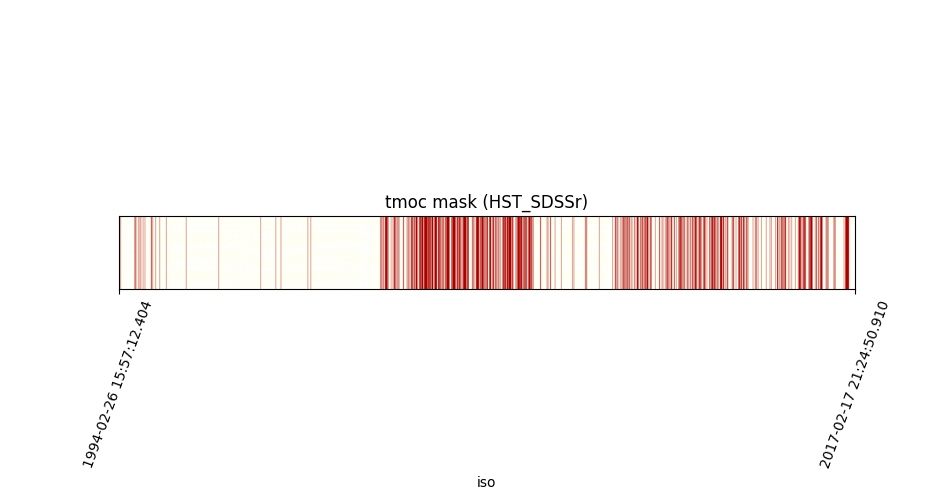

In [3]:
from mocpy import TimeMoc

time_moc = TimeMoc.from_moc_fits_file('http://alasky.u-strasbg.fr/HST-hips/filter_SDSSr_hips/TMoc.fits')
time_moc.plot(title='tmoc mask (HST_SDSSr)')

In [4]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('II/285')[1]

print(table)

 Name  Ref      JD       Vmag  U-B  B-V    V-Rc  Rc-Ic  V-Ic 
                d        mag   mag  mag    mag    mag   mag  
------ --- ------------ ------ --- ------ ------ ----- ------
 T ANT 978 2443914.3750     --  --  0.802  0.391    --  0.856
 T ANT 978 2443915.4410     --  --  0.861  0.460    --  0.803
 T ANT 978 2444297.4250  9.360  --  0.791  0.431    --  0.840
 T ANT 978 2444298.4760  9.520  --  0.853  0.463    --  0.903
 T ANT 978 2444299.4940  9.720  --  0.927  0.484    --  0.953
 T ANT 978 2444300.4070  9.575  --  0.809  0.441    --  0.872
 T ANT 978 2444301.4180  8.881  --  0.499  0.309    --  0.608
 T ANT 978 2444302.4110  9.139  --  0.661  0.392    --  0.754
 T ANT 976 2451619.3105  9.738  --  0.910     --    --  0.959
 T ANT 976 2451619.3828     --  --     --     --    --  0.974
   ... ...          ...    ... ...    ...    ...   ...    ...
NN VUL 950 2445204.2187 14.102  --  1.372     --    --     --
NN VUL 950 2445205.2265 14.075  --  1.423     --    --     --
NN VUL 9

CPU times: user 1.59 s, sys: 4 ms, total: 1.6 s
Wall time: 1.61 s


<IPython.core.display.Javascript object>


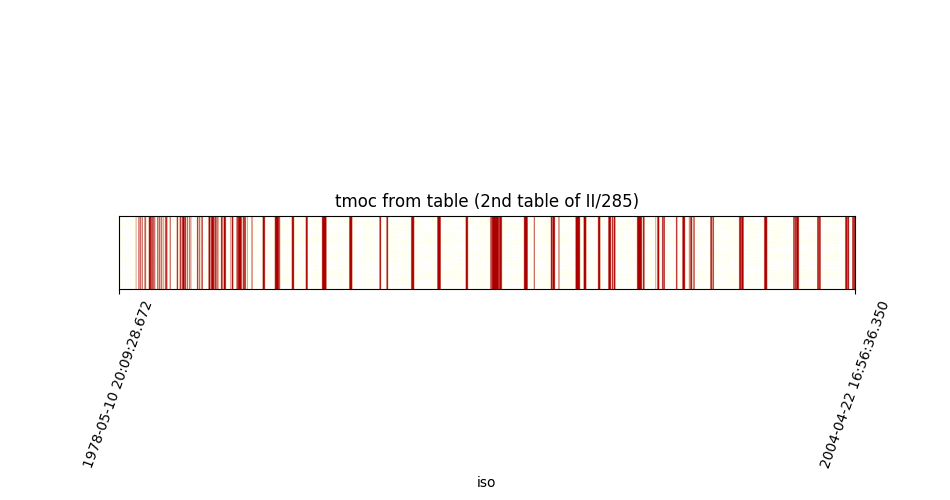

Min time: 2443639.339915188
Max time: 2453118.2059762725
Total duration: 19649475379200
max order: 14


In [9]:
%time table_moc = TimeMoc.from_table(table, t_column='JD', format='jd')
table_moc.plot(title='tmoc from table (2nd table of II/285)')
print('Min time:', table_moc.min_time)
print('Max time:', table_moc.max_time)
print('Total duration:', table_moc.total_duration)
print('max order:', table_moc.max_order)

In [10]:
# filtering the table through the tmoc loaded from file (e.g. time_moc)
from astropy.time import TimeDelta

filtered_table = time_moc.filter_table(table=table,
                                      column_name='JD',
                                      format='jd',
                                      keep_inside=True,
                                      delta_t=TimeDelta(3600, format='sec', scale='tdb'))
print(time_moc.max_order)
print(filtered_table)

29
 Name  Ref      JD       Vmag  U-B B-V V-Rc Rc-Ic  V-Ic 
                d        mag   mag mag mag   mag   mag  
------ --- ------------ ------ --- --- ---- ----- ------
 T ANT 968 2453021.3273  9.396  --  --   --    --  0.873
 T ANT 968 2453022.4863  9.630  --  --   --    --  0.935
 T ANT 968 2453022.5731  9.647  --  --   --    --  0.925
 V CAR 968 2453022.4809  7.510  --  --   --    --  0.942
UX CAR 968 2453021.3261  8.450  --  --   --    --  0.842
YZ CAR 968 2453021.3419  8.462  --  --   --    --  1.204
YZ CAR 968 2453022.5743  8.562  --  --   --    --     --
CT CAR 968 2453021.3427 12.627  --  --   --    --  1.776
HQ CAR 968 2453021.3405 12.025  --  --   --    --  0.886
HQ CAR 968 2453022.5727 11.783  --  --   --    --  0.812
   ... ...          ...    ... ... ...  ...   ...    ...
RZ VEL 968 2453022.6020  6.572  --  --   --    --     --
SW VEL 968 2453022.4837  7.977  --  --   --    --     --
SX VEL 968 2453021.3384  8.435  --  --   --    --  1.124
SX VEL 968 2453022.4842  8.5

<IPython.core.display.Javascript object>


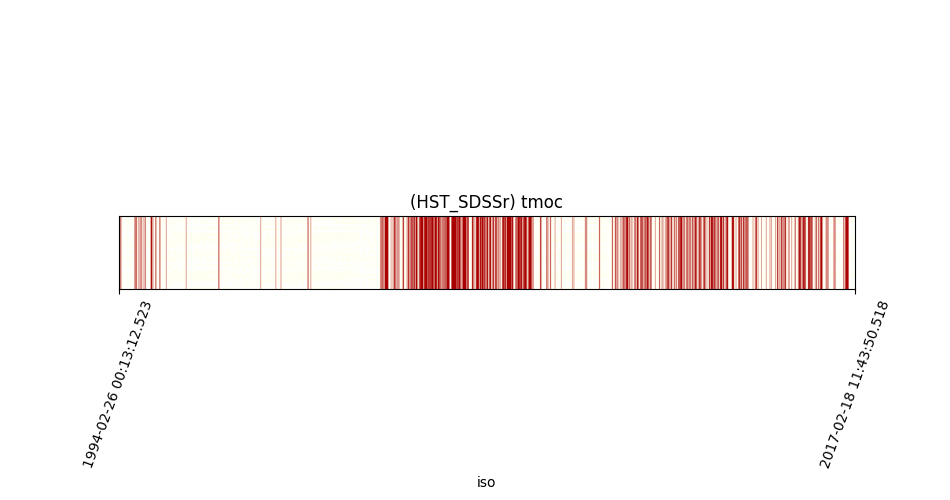

<IPython.core.display.Javascript object>


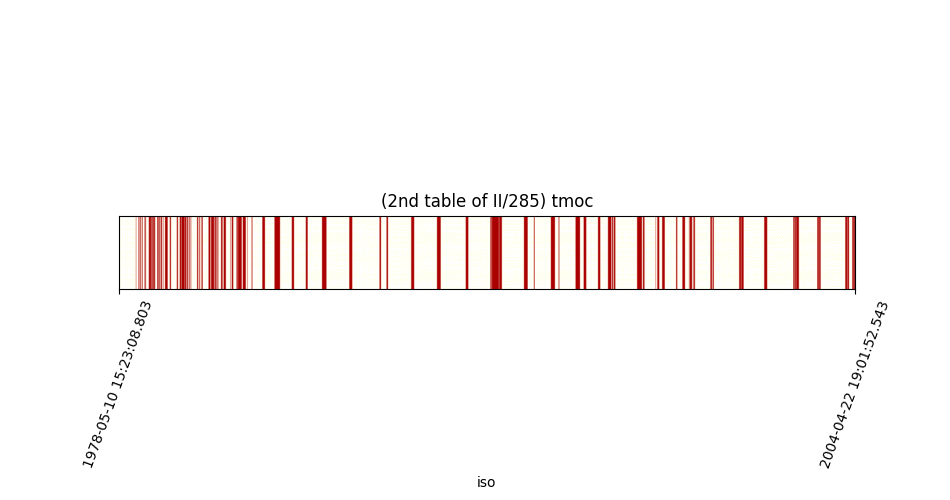

<IPython.core.display.Javascript object>


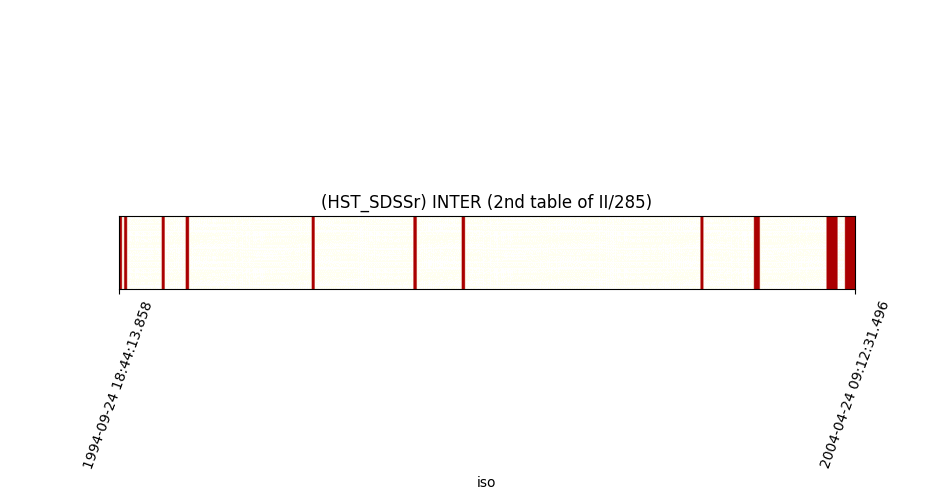

(HST_SDSSr) INTER (2nd table of II/285) max order :  9
(HST_SDSSr) max order :  11
(2nd table of II/285) max order :  11


In [20]:
res = table_moc.intersection(time_moc, delta_t=TimeMoc.order_to_time_resolution(9))

time_moc.plot(title='(HST_SDSSr) tmoc')
table_moc.plot(title='(2nd table of II/285) tmoc')
res.plot(title='(HST_SDSSr) INTER (2nd table of II/285)')

print('(HST_SDSSr) max order : ', time_moc.max_order)
print('(2nd table of II/285) max order : ', table_moc.max_order)
print('(HST_SDSSr) INTER (2nd table of II/285) max order : ', res.max_order)


<IPython.core.display.Javascript object>


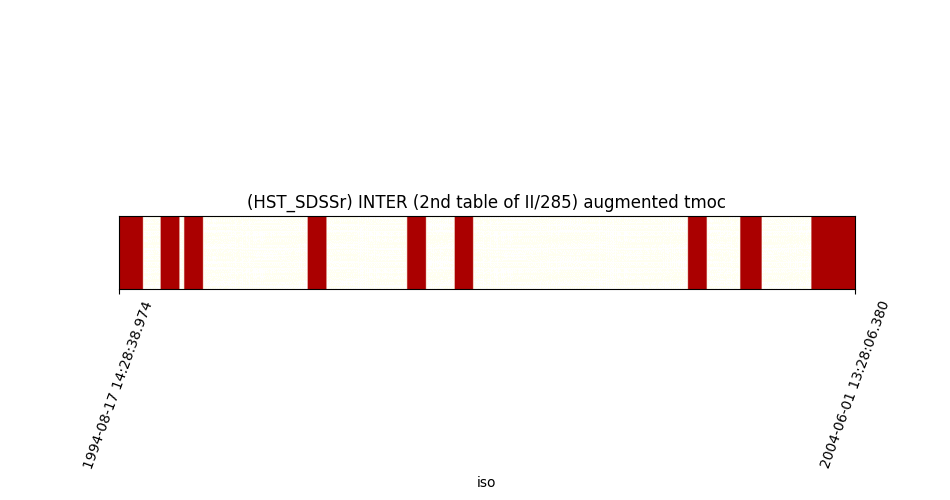

<IPython.core.display.Javascript object>


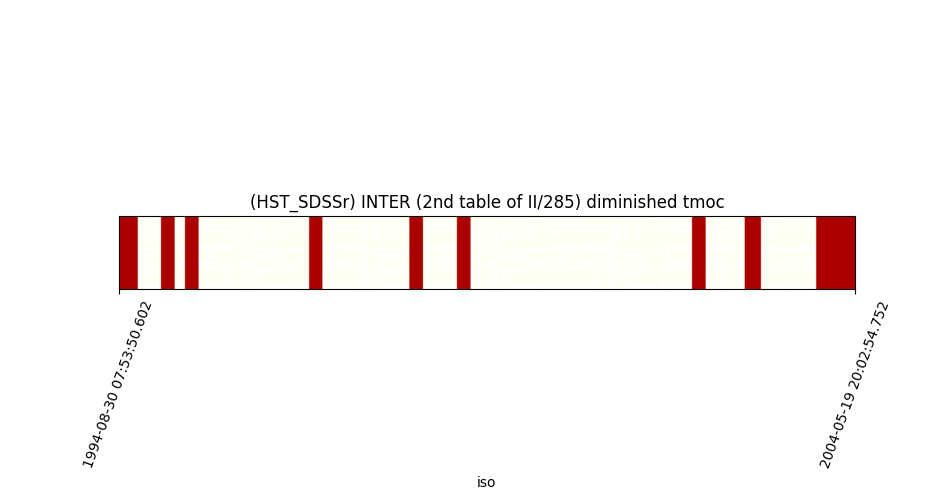

In [24]:
res.add_neighbours()
res.plot(title='(HST_SDSSr) INTER (2nd table of II/285) augmented tmoc')

res.remove_neighbours()
res.plot(title='(HST_SDSSr) INTER (2nd table of II/285) diminished tmoc')